Import Library

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

import seaborn as sb


# data visualization
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.ensemble import RandomForestClassifier


Insert Dataset

In [2]:
raw_data = pd.read_csv('HappinessReport2018_Table2.1.csv')

In [3]:
raw_data.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Find out percenatge of missing data

In [4]:
total = raw_data.isnull().sum().sort_values(ascending=False)
percent_1 = raw_data.isnull().sum()/raw_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
"Most people can be trusted, WVS round 1981-1984",1579,92.7
"Most people can be trusted, Gallup",1524,89.4
"Most people can be trusted, WVS round 1989-1993",1484,87.1
"Most people can be trusted, WVS round 1999-2004",1213,71.2
"Most people can be trusted, WVS round 1994-1998",1086,63.7
"Most people can be trusted, WVS round 2005-2009",1074,63.0
GINI index (World Bank estimate),1061,62.3
"Most people can be trusted, WVS round 2010-2014",1033,60.6
"gini of household income reported in Gallup, by wp5-year",369,21.7
"GINI index (World Bank estimate), average 2000-16",202,11.9


Based on the table above, we can find the first 5 parameters have more than 11% of data missing. Hence these data will be cleared. As we will not consider the change of any parameters, the two standard deviation factor will be dropped also. 

In [5]:
happiness_data = pd.DataFrame(raw_data[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Positive affect',  'Negative affect', 'Confidence in national government']])
happiness_data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072
1,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545
2,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357
3,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386
4,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440


In [6]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 10 columns):
Life Ladder                          1704 non-null float64
Log GDP per capita                   1676 non-null float64
Social support                       1691 non-null float64
Healthy life expectancy at birth     1676 non-null float64
Freedom to make life choices         1675 non-null float64
Generosity                           1622 non-null float64
Perceptions of corruption            1608 non-null float64
Positive affect                      1685 non-null float64
Negative affect                      1691 non-null float64
Confidence in national government    1530 non-null float64
dtypes: float64(10)
memory usage: 133.2 KB


Drop all the rows that has missing data

In [7]:
happiness_data = happiness_data.dropna()
happiness_data.to_csv('cleaned_data.csv')

In [8]:
#happiness_data = happiness_data.drop('index', axis=1)
#happiness_data = happiness_data.drop("level_0", axis=1)
#happiness_data.head()

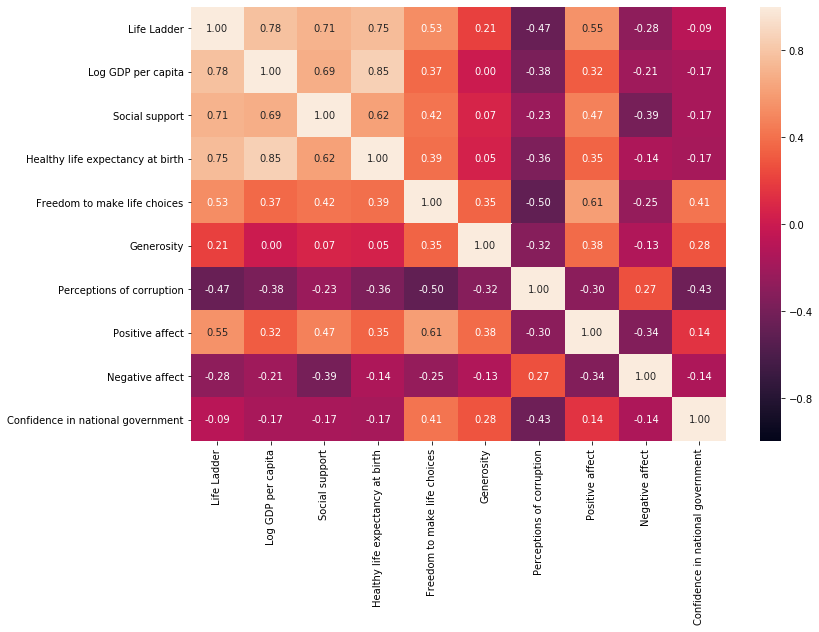

In [9]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(happiness_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [10]:
happiness_data = pd.DataFrame(happiness_data[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
happiness_data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
0,3.723590,7.168690,0.450662,50.799999
1,4.401778,7.333790,0.552308,51.200001
2,4.758381,7.386629,0.539075,51.599998
3,3.831719,7.415019,0.521104,51.919998
4,3.782938,7.517126,0.520637,52.240002


In [11]:
happiness_train = happiness_data.sample(frac = 0.75)
happiness_train.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
1307,4.750384,9.409686,0.844413,65.599998
820,5.252193,8.065153,0.898025,62.779999
1074,7.540877,10.763623,0.925944,72.099998
1212,4.976925,8.749375,0.846413,61.200001
739,6.238198,10.510457,0.938148,73.440002


In [12]:
happiness_test = happiness_data.loc[~happiness_data.index.isin(happiness_train.index)]
happiness_test.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
4,3.782938,7.517126,0.520637,52.240002
7,3.982855,7.500539,0.528597,53.200001
9,2.661718,7.497755,0.490880,52.799999
18,4.606651,9.302960,0.639356,67.800003
19,4.511101,9.337532,0.638411,68.099998


In [13]:
X_train = happiness_train.drop("Life Ladder", axis=1)
Y_train = happiness_train["Life Ladder"]
X_test = happiness_test.drop("Life Ladder", axis =1)
Y_test = happiness_test["Life Ladder"]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)
X_train_scaled.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth
1307,0.198473,0.270064,0.324655
820,-0.921172,0.719908,-0.034631
1074,1.325950,0.954174,1.152798
1212,-0.351394,0.286846,-0.235933
739,1.115128,1.056574,1.323523


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [16]:
rf.score (X_test_scaled, Y_test) #accuracy 

0.8181220830454801

In [17]:
#prediction using random forest model and x_test
rf_y_predict = rf.predict(X_test_scaled)
prediction_restlt = pd.DataFrame({'Log GDP per capita': X_test_scaled['Log GDP per capita'], 'Social support': X_test_scaled['Social support'], 'Healthy life expectancy at birth': X_test_scaled['Healthy life expectancy at birth'], 'happiness':rf_y_predict })
prediction_restlt.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,happiness
4,-1.377536,-2.446672,-1.377495,3.448907
7,-1.391349,-2.379877,-1.255185,3.648567
9,-1.393667,-2.696354,-1.306148,3.299829
18,0.109598,-1.450524,0.604950,4.861423
19,0.138388,-1.458450,0.643172,4.911969


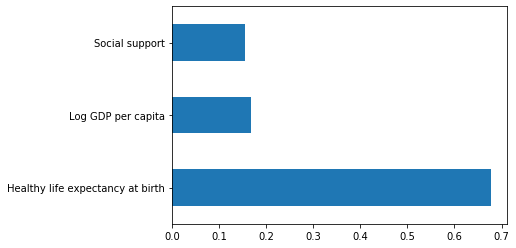

In [18]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

Intercept of Regression 	: b =  5.440712238854614
Coefficients of Regression 	: a =  [0.35377471 0.3556839  0.32990715]



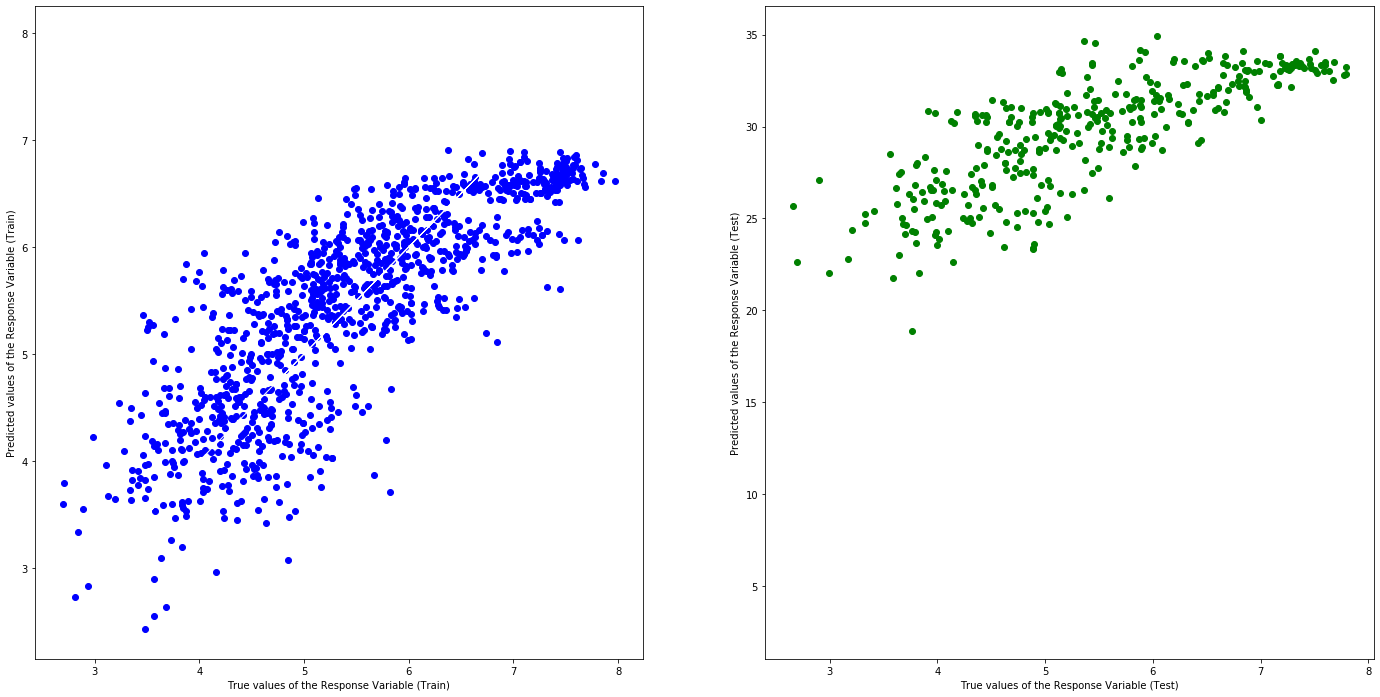

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -459.4091132868603
Mean Squared Error (MSE) 	: 0.419116948074096

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -438.333943456213
Mean Squared Error (MSE) 	: 592.0093988036666



array([6.73283163])